In [3]:
#IMPORTING LIBRARIES
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
 


In [4]:
#SPLITING DATA INTO TRAIN AND VALIDATION SET

image_width = 180
image_height = 180
batch_size = 32
path = r'C:\Users\pande\Desktop\AI\cell_images\cell_images'

#TRAINING SET
train_data = tf.keras.preprocessing.image_dataset_from_directory(
            path,
            validation_split = 0.2,
            subset = "training",
            seed = 1337,
            image_size = (image_width,image_height),
            batch_size = batch_size,
            )

#VALIDATION SET
val_data = tf.keras.preprocessing.image_dataset_from_directory(
            path,
            validation_split = 0.2,
            subset = "validation",
            seed = 1337,
            image_size = (image_width,image_height),
            batch_size = batch_size,
            )

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


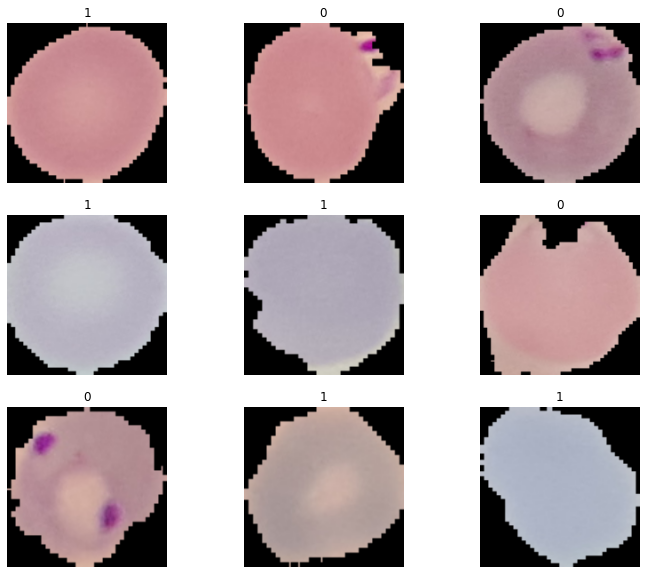

In [5]:
#VISULAIZING DATA

plt.figure(figsize=(12, 10))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off") 
        
#1indicates uninfected
#0 indicates infected

In [6]:
#MODEL

model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (image_width,image_height,3)))
model.add(layers.MaxPool2D((2,2),padding='same'))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2),padding='same'))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2),padding='same'))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))


model.add(layers.Flatten())

model.add(layers.Dense(512,activation='relu'))


model.add(layers.Dense(1,activation='sigmoid'))



In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 44, 44, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 42, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 128)       1

In [9]:
#COMPILATION OF MODEL
lr = 0.001
model.compile(optimizer=optimizers.Adam(learning_rate=lr),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [10]:
model.fit(train_data, epochs=5, validation_data=val_data , batch_size=128)

Epoch 1/5
689/689 [==============================] - 835s 1s/step - loss: 1.1684 - accuracy: 0.6562 - val_loss: 0.2082 - val_accuracy: 0.9260
Epoch 2/5
689/689 [==============================] - 727s 1s/step - loss: 0.1838 - accuracy: 0.9394 - val_loss: 0.1453 - val_accuracy: 0.9516
Epoch 3/5
689/689 [==============================] - 671s 974ms/step - loss: 0.1587 - accuracy: 0.9488 - val_loss: 0.1381 - val_accuracy: 0.9546
Epoch 4/5
689/689 [==============================] - 638s 925ms/step - loss: 0.1257 - accuracy: 0.9574 - val_loss: 0.1390 - val_accuracy: 0.9534
Epoch 5/5
689/689 [==============================] - 626s 908ms/step - loss: 0.1113 - accuracy: 0.9620 - val_loss: 0.1430 - val_accuracy: 0.9512


In [11]:
plt.style.use('seaborn')
fig_size = (12, 8)
title_size = 18

plt.figure(figsize=fig_size)
plt.plot(history.epoch, history.history['accuracy'])
plt.title('Model Accuracy', size=title_size)
plt.show()

plt.figure(figsize=fig_size)
plt.plot(history.epoch, history.history['loss'])
plt.title('Model Loss', size=title_size)
plt.show()

plt.figure(figsize=fig_size)
plt.plot(history.epoch, history.history['val_accuracy'])
plt.title('Model Validation Accuracy', size=title_size)
plt.show()

plt.figure(figsize=fig_size)
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Model Validation Loss', size=title_size)
plt.show()

NameError: name 'history' is not defined

<Figure size 864x576 with 0 Axes>